In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import statsmodels.api as sm

%matplotlib inline
sns.set_context('notebook') # optimises picture for notebook viewing

In [126]:
data = pd.read_excel("Price History_Commonwealth bank.xlsx", header=11)

In [127]:
data.head()

,Exchange Date,Close,%Chg,Volume
0,2012-01-03,51.162997,0.007924,3.186785e+06
1,2012-01-04,51.529780,0.007660,3.606286e+06
2,2012-01-05,50.596717,-0.006801,2.608491e+06
3,2012-01-06,50.360652,-0.002820,3.515135e+06
4,2012-01-09,50.292996,-0.002222,2.995256e+06


In [128]:
Pt = []

for i in range(len(data)):
    Pt.append(data["Close"][i])

In [129]:
y_t = []
for i in range(1,len(Pt)):
    y_t.append(np.log(Pt[i])-np.log(Pt[i-1]))
    

In [130]:
stats.describe(y_t)

DescribeResult(nobs=2197, minmax=(-0.12127472219891278, 0.10488933842627901), mean=-2.9785409479206138e-05, variance=0.00022228392695257442, skewness=-0.48010030905442797, kurtosis=9.43885324688784)

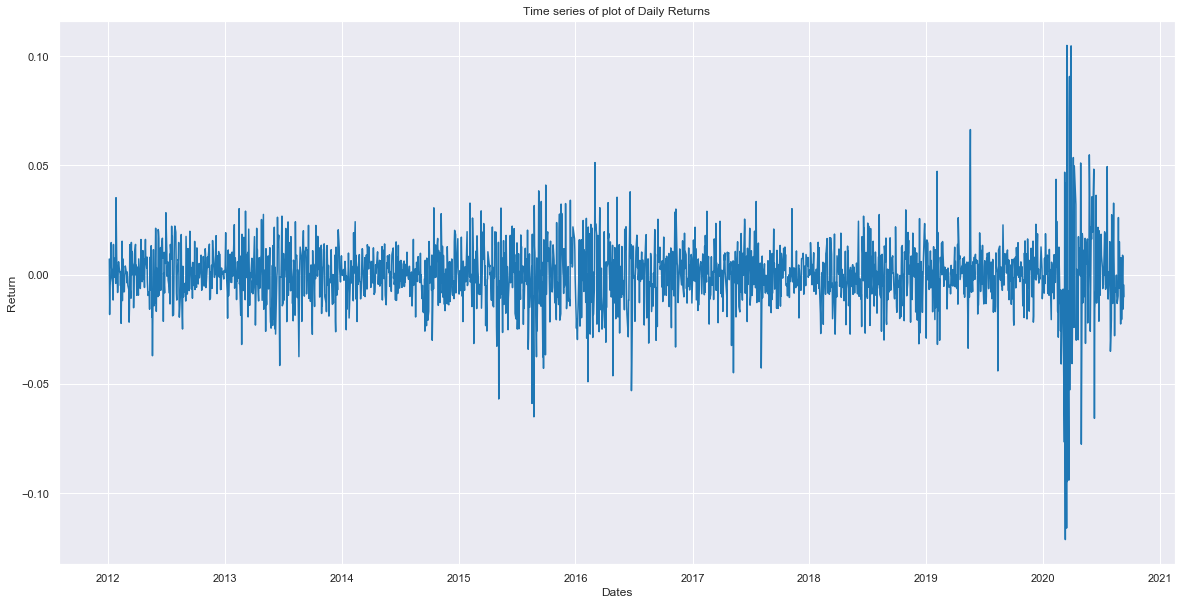

In [131]:
plt.figure(figsize=(20,10))
plt.title("Time series of plot of Daily Returns")
sns.set_style('darkgrid')
plt.ylabel('Return')
plt.xlabel('Dates')
plt.plot(data.loc[1:,['Exchange Date']],y_t)

In [132]:
y_tt = np.array(y_t)
y_tt = pd.DataFrame(y_tt,columns=["y_t"])

In [133]:
data = pd.concat([data,y_tt],axis=1)
data['y_t'] = data['y_t'].shift(1)

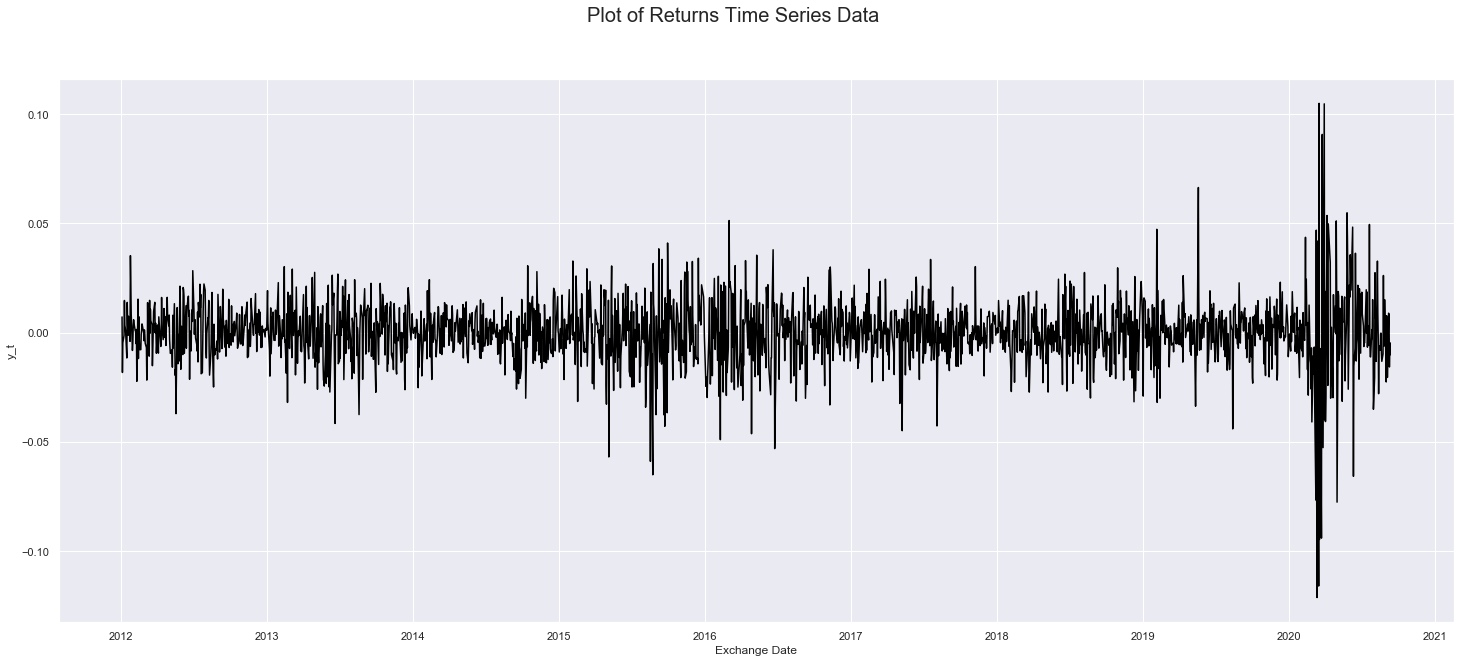

In [137]:
fig = plt.figure(figsize=(25,10))
sns.set_style('darkgrid')
plt.suptitle('Plot of Returns Time Series Data',fontsize=20)
sns.lineplot(x=data['Exchange Date'],y=data['y_t'],color='black')

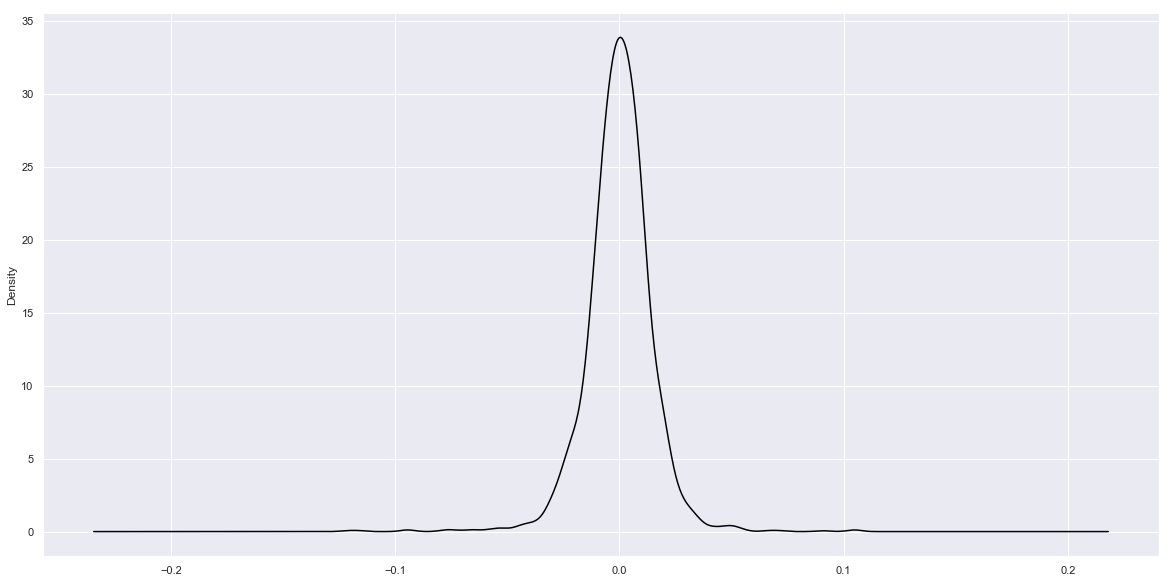

In [141]:
plt.figure(figsize=(20,10))

data['y_t'].plot(kind='kde',color='black')
plt.show()

(-0.4, 0.4)

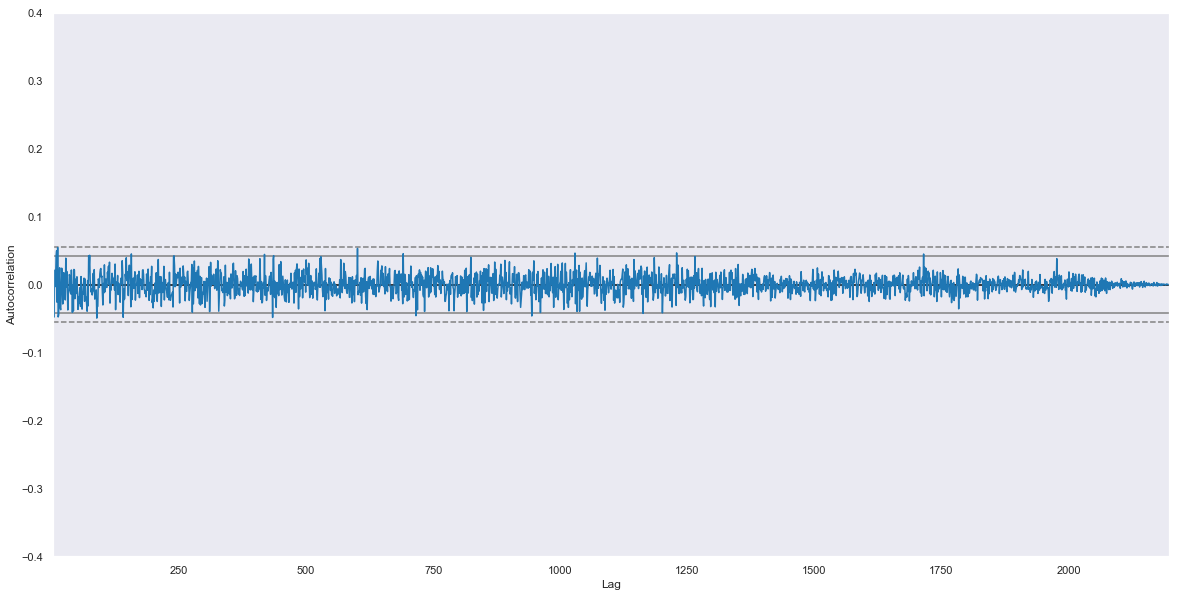

In [149]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,10))
autocorrelation_plot(y_t)

plt.ylim(-0.4,0.4)

In [9]:
#should also include the histogram of prices - normal distribution

#autocorrelation <-- Random Walk